In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [2]:
#Импорт библиотек и модулей
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import data_preprocessing as dp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

In [3]:
#Загрузка датасета
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#Удаление ненужных данных
data = data.drop(columns='Time')

In [5]:
#Проверка на пропущенные значения
dp.missing_values_report(data)

Series([], dtype: int64)

In [6]:
#Статистика колонок датасета
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


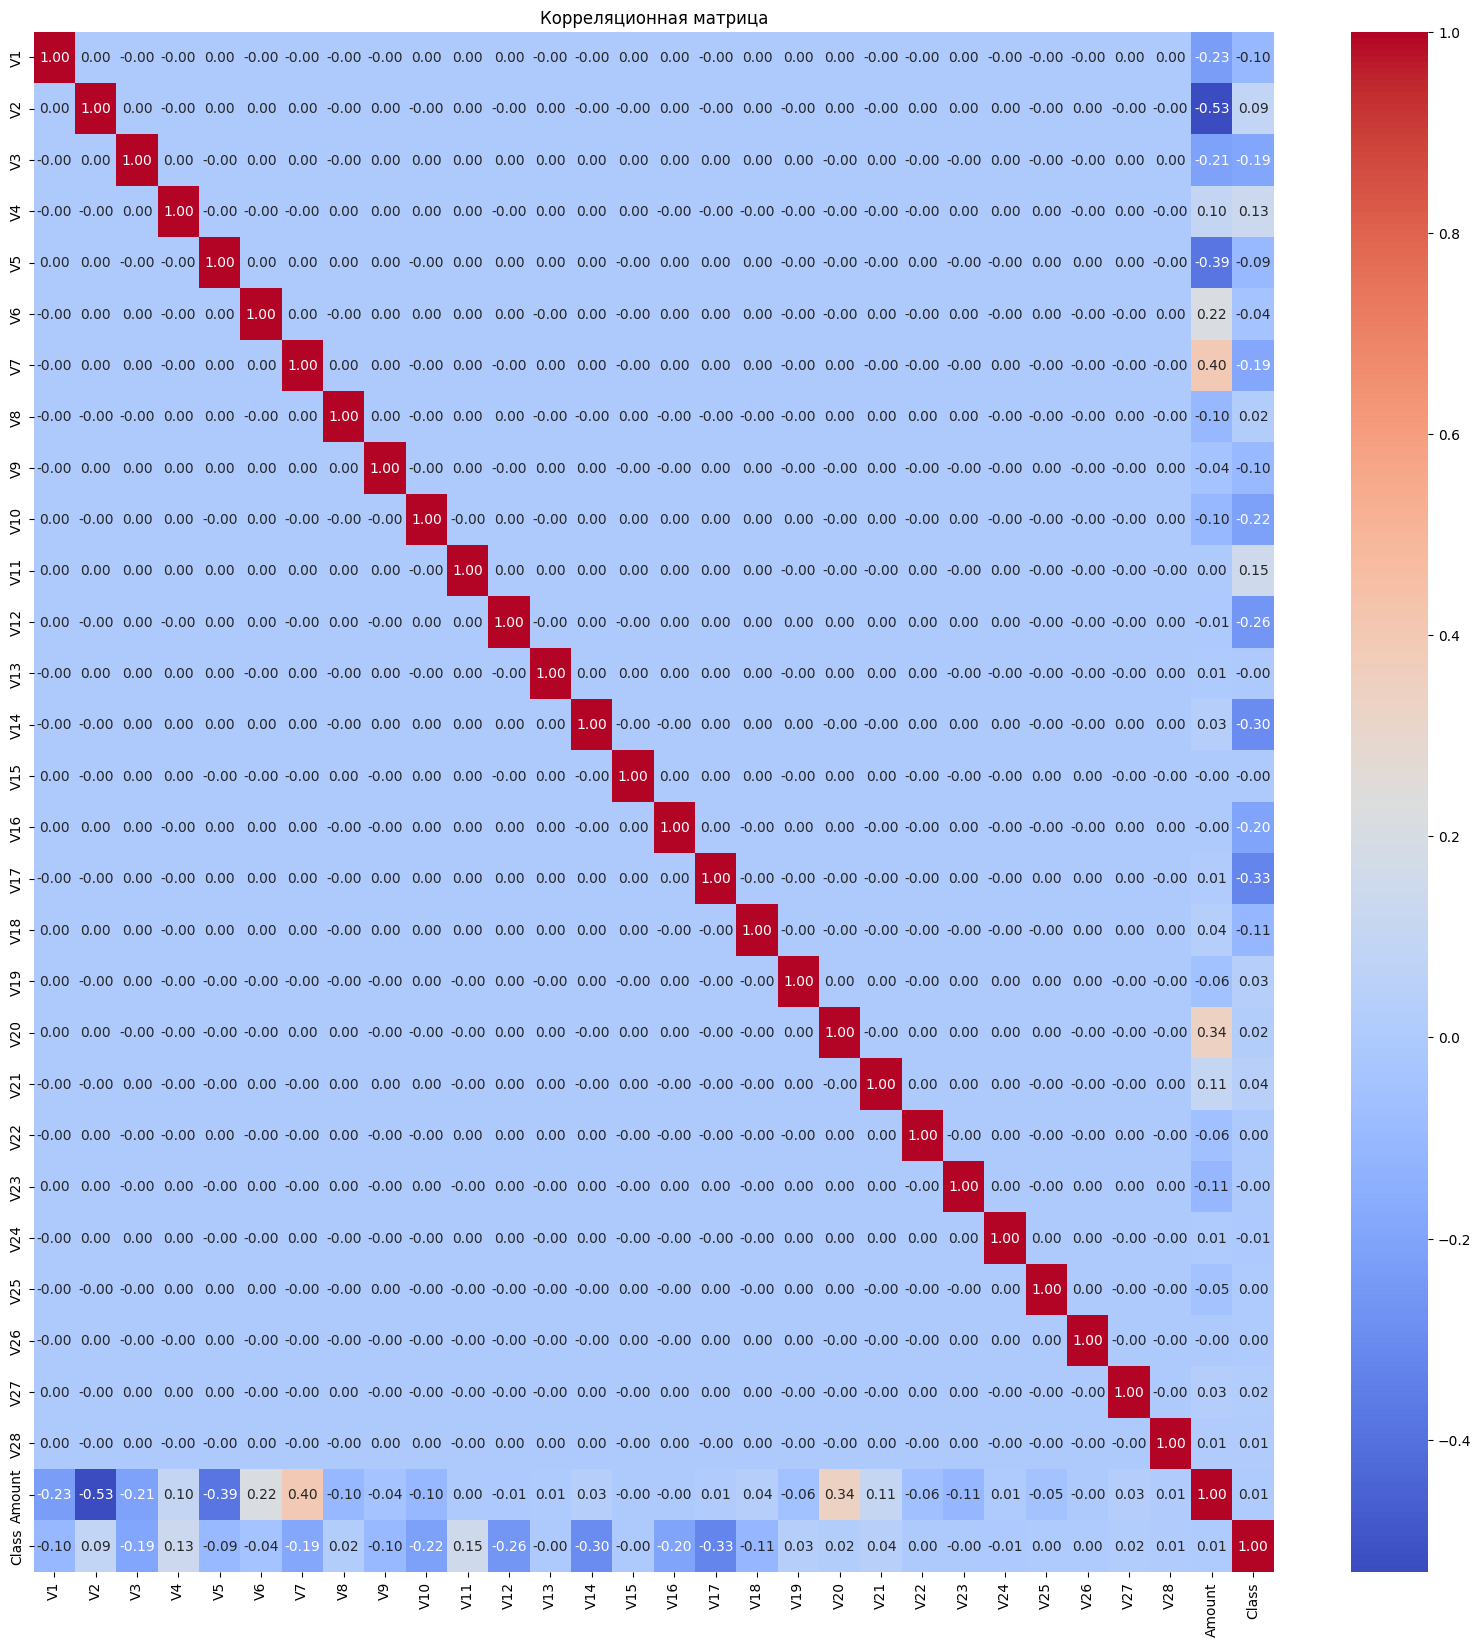

In [ ]:
#Корреляционная матрица
plt.figure(figsize=(20, 20))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

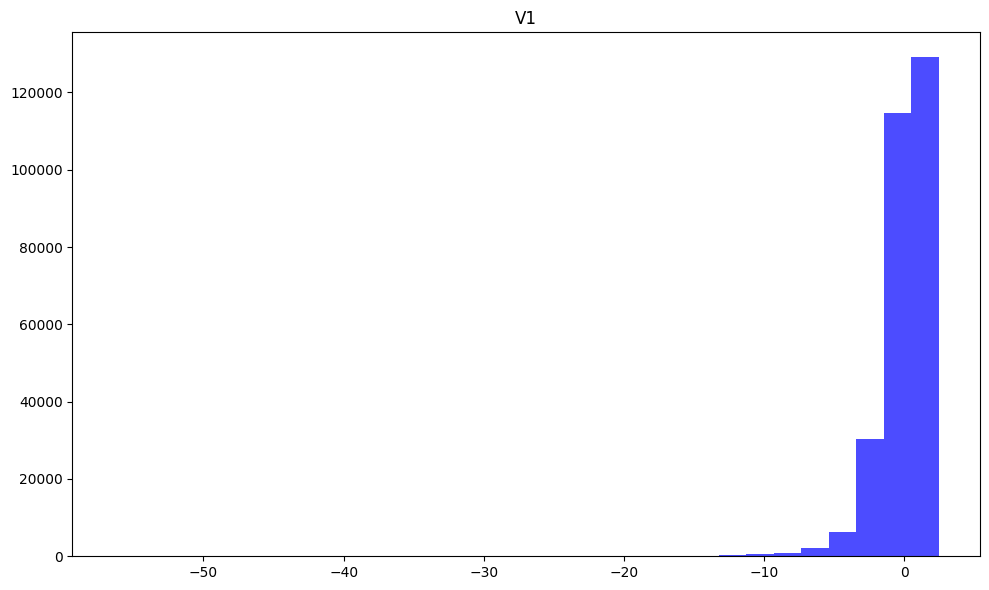

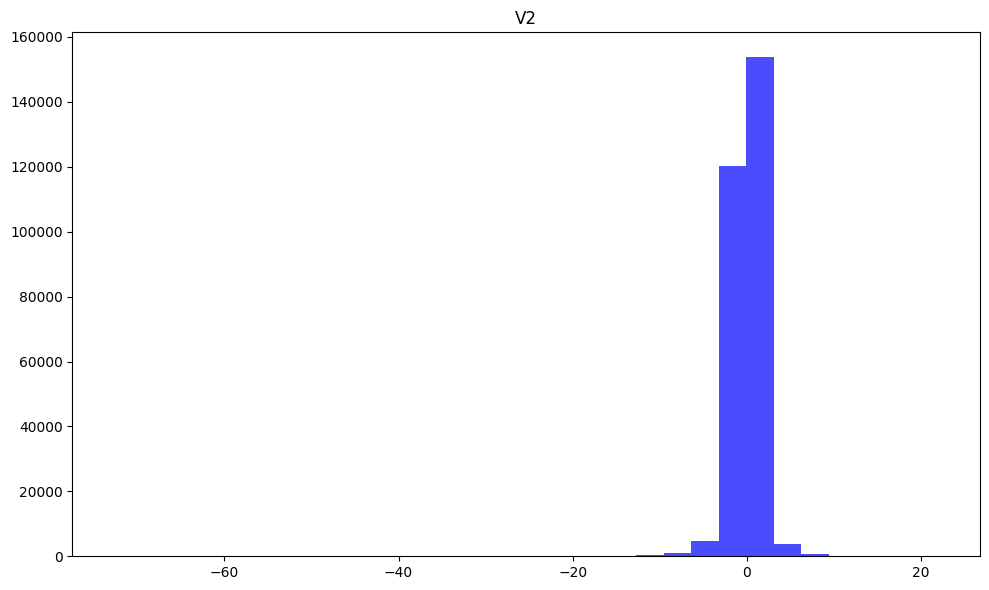

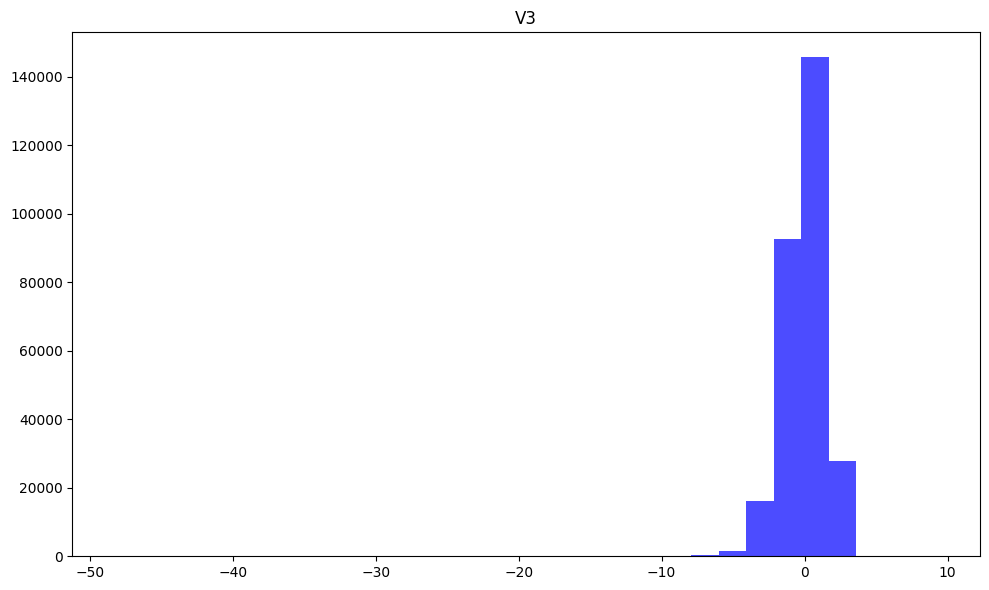

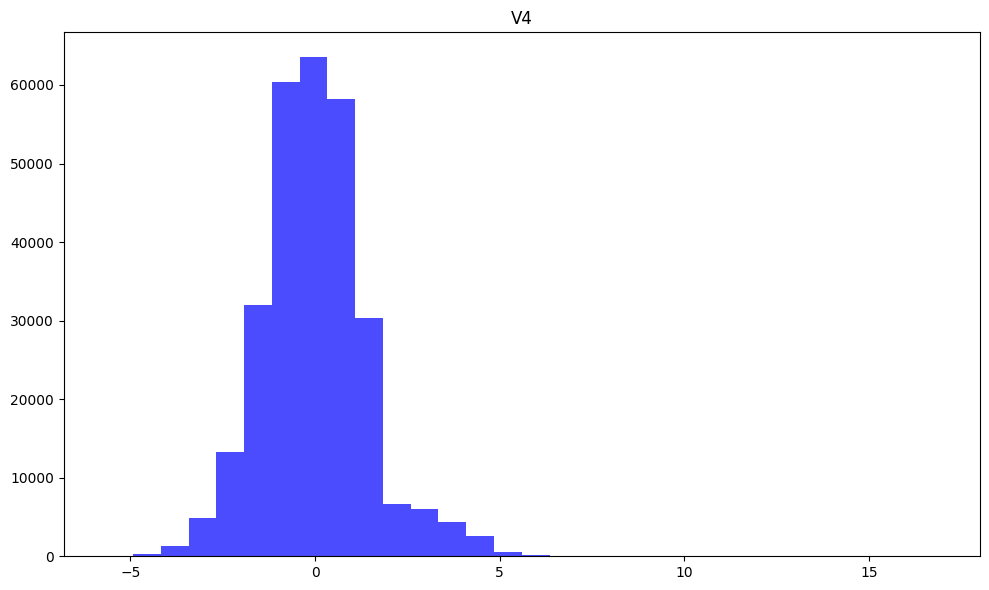

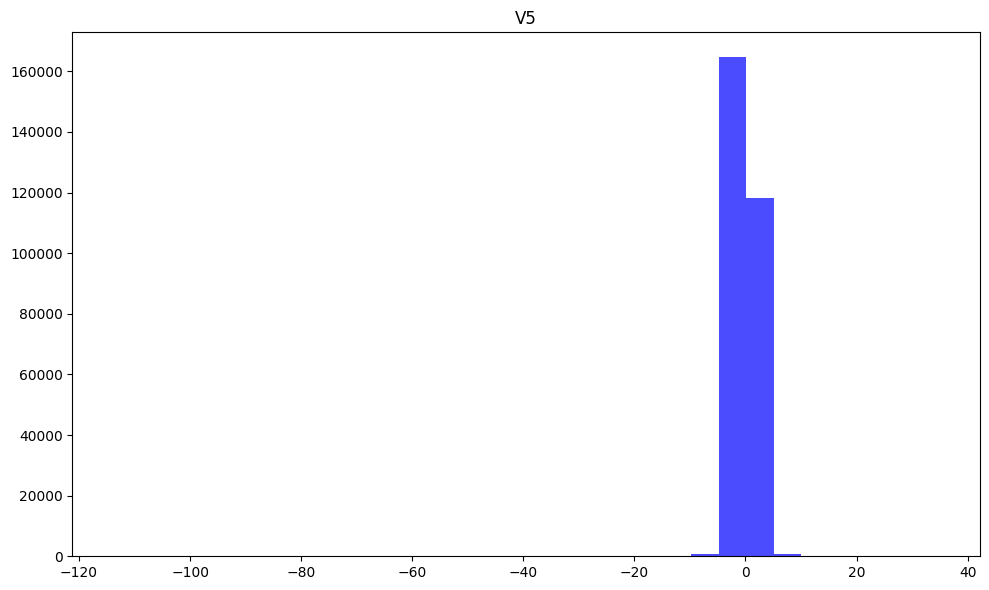

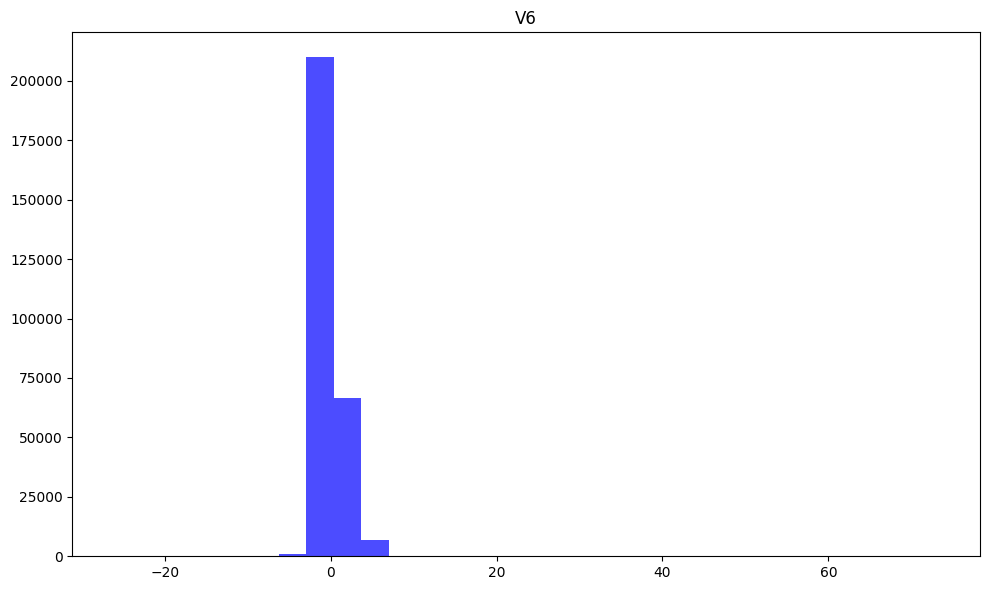

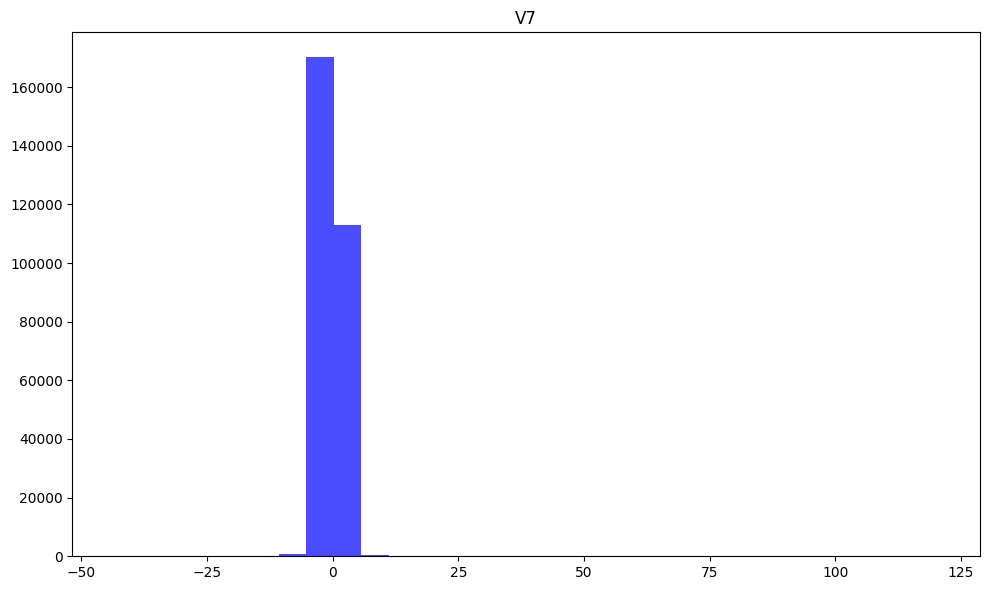

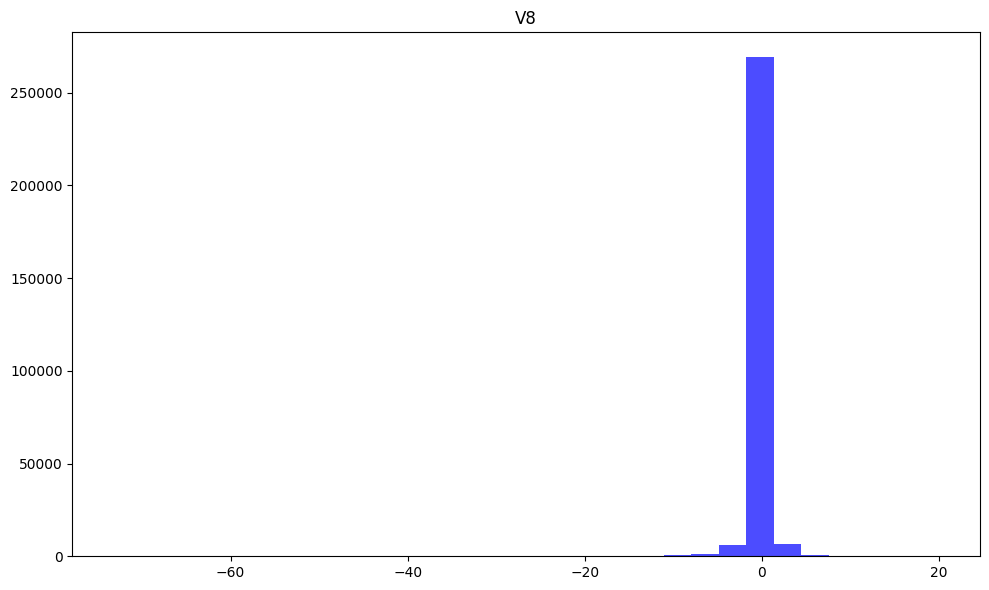

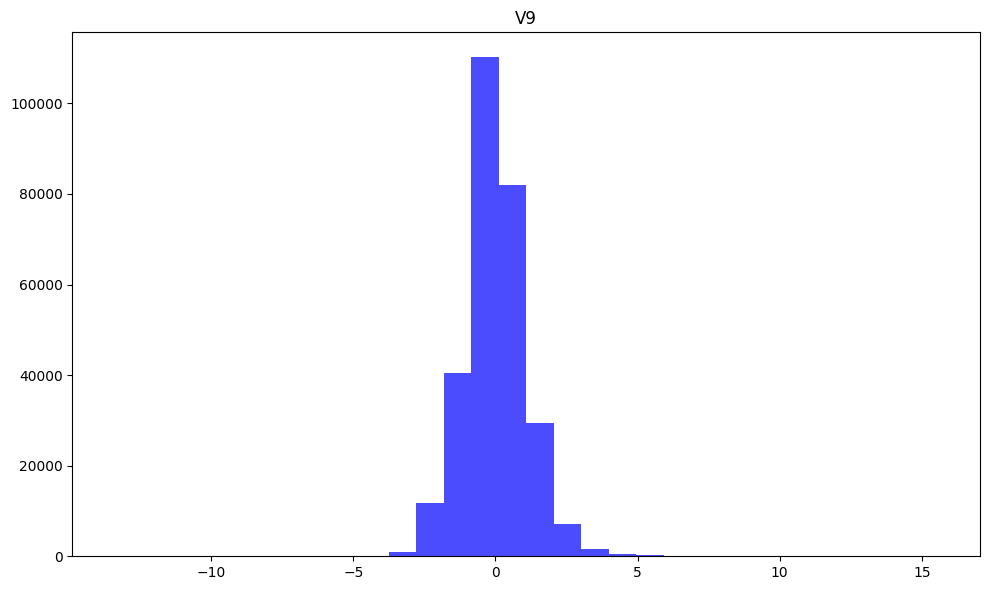

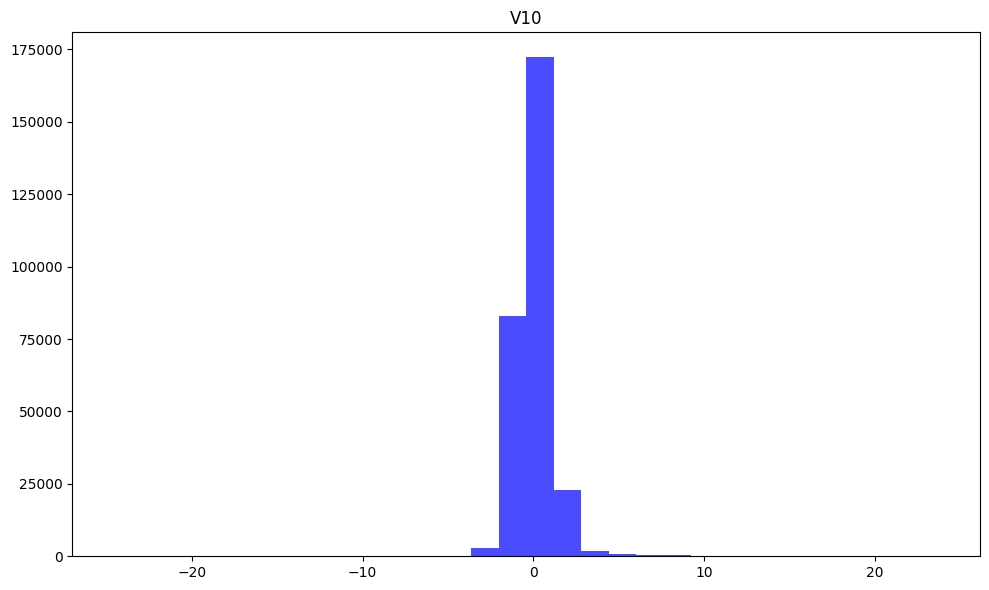

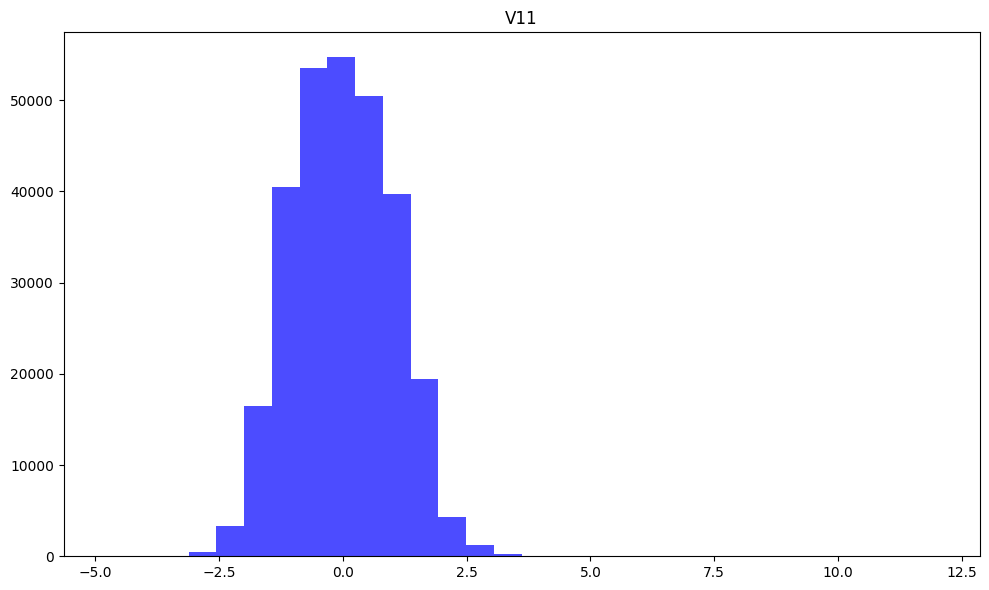

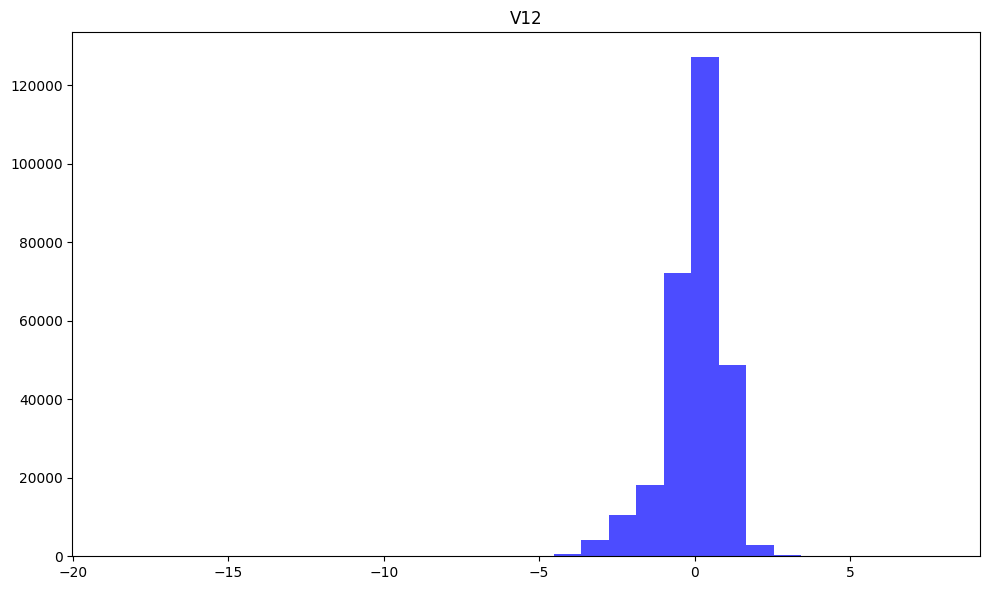

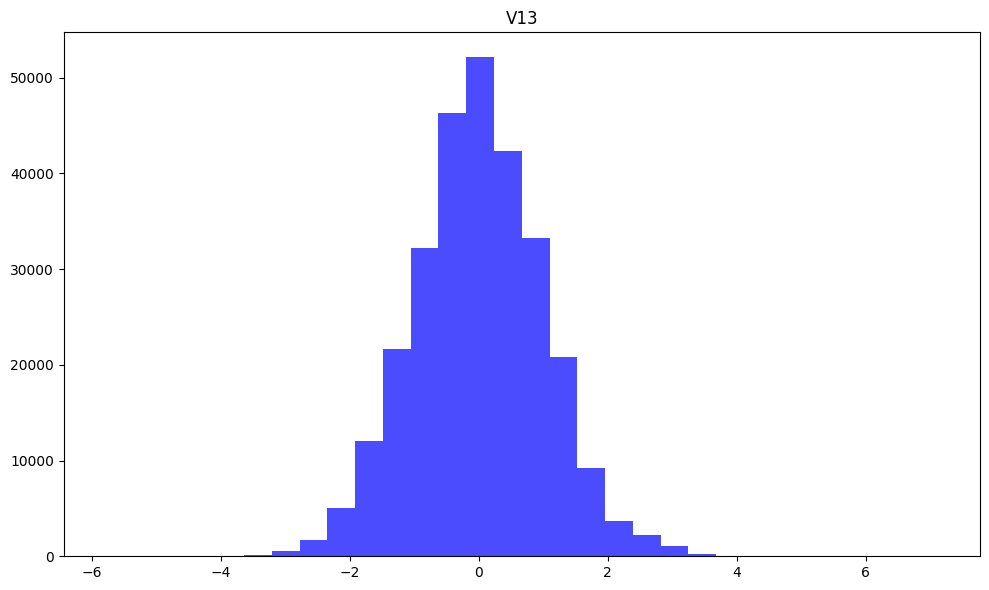

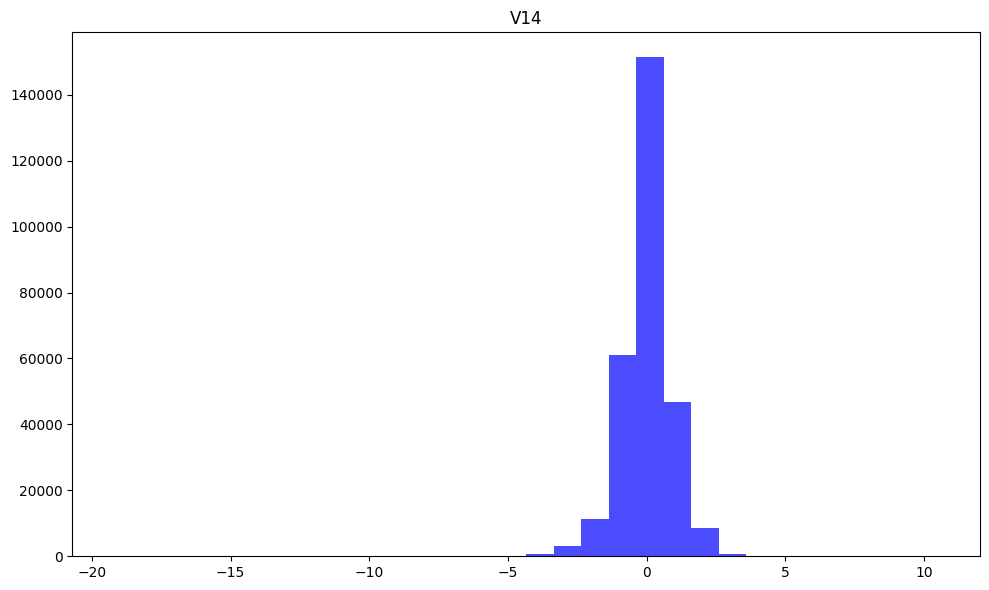

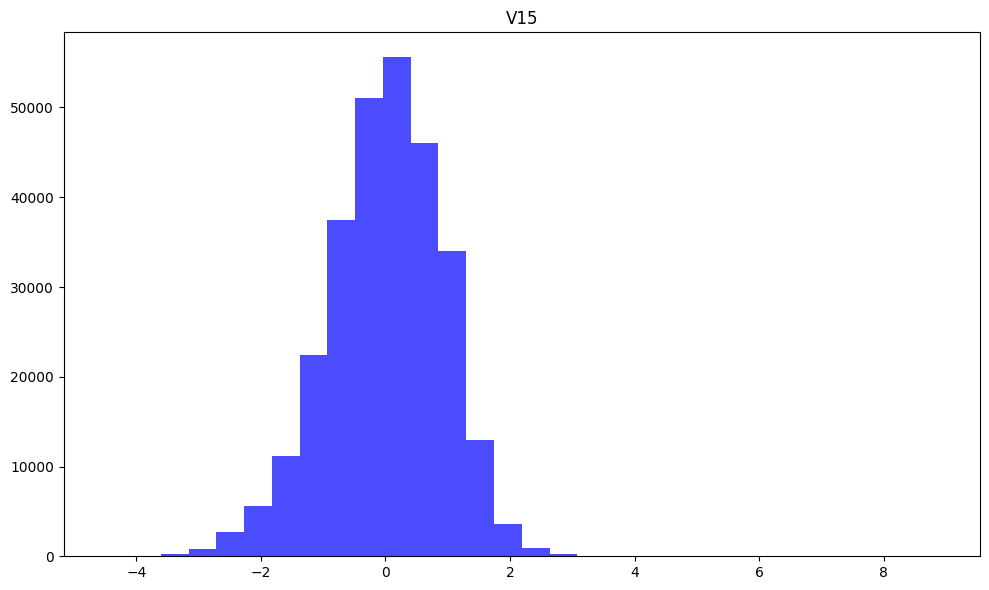

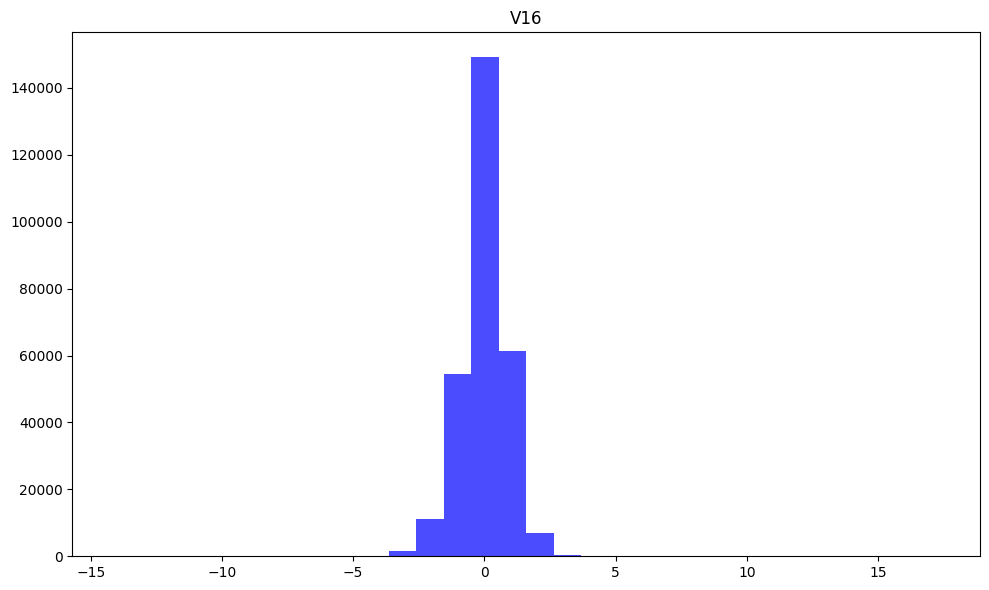

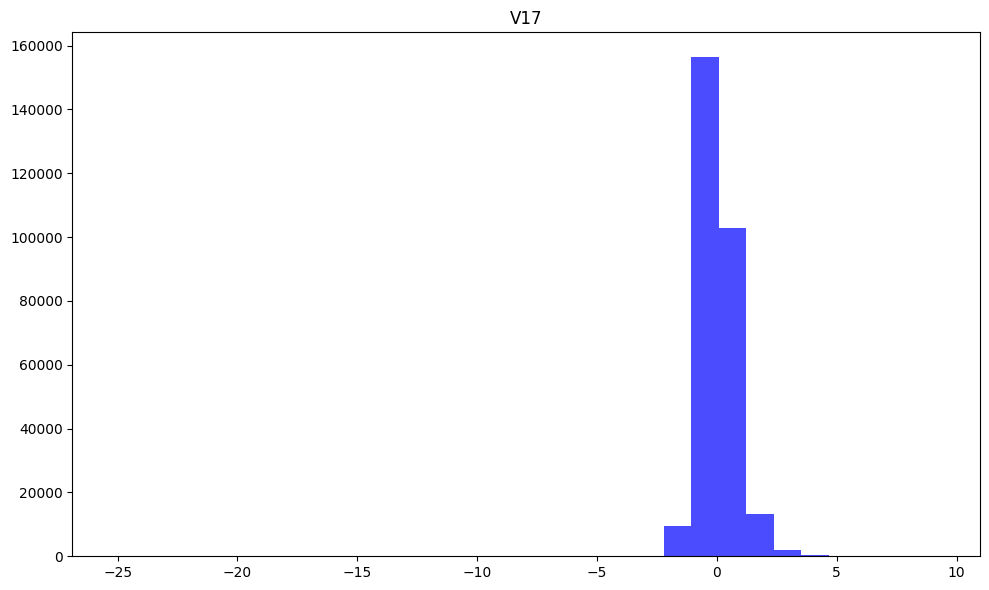

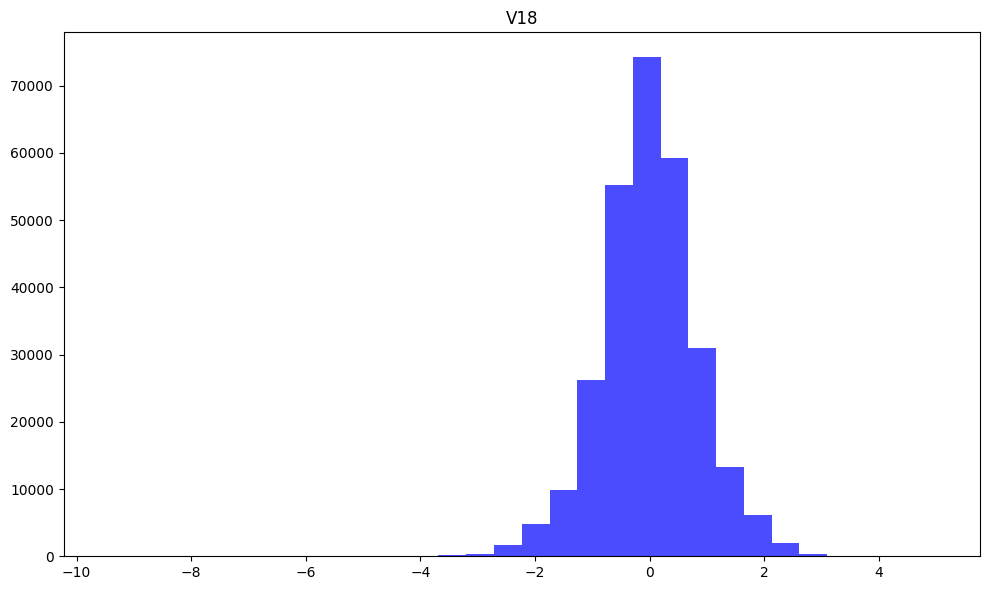

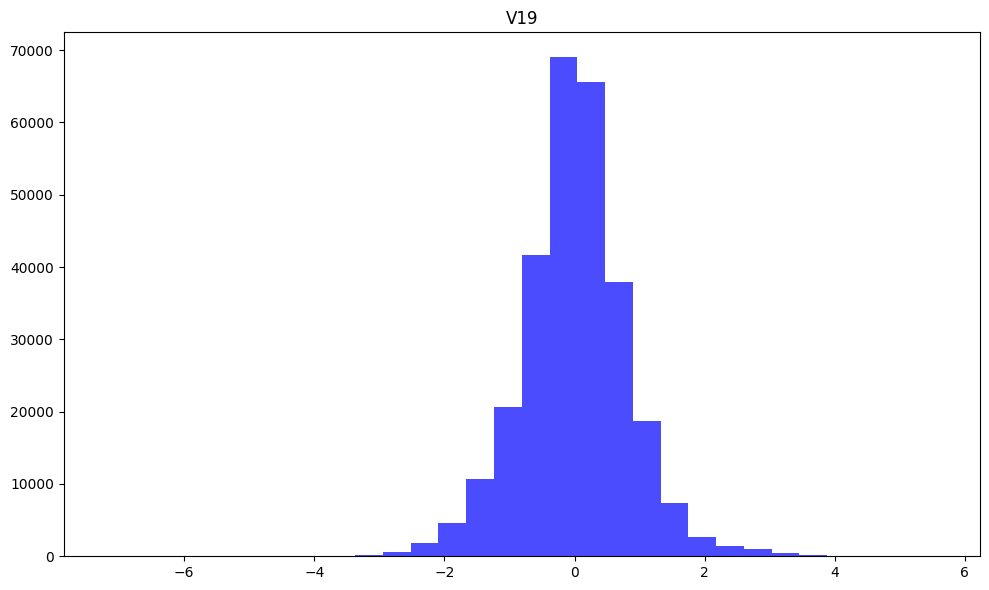

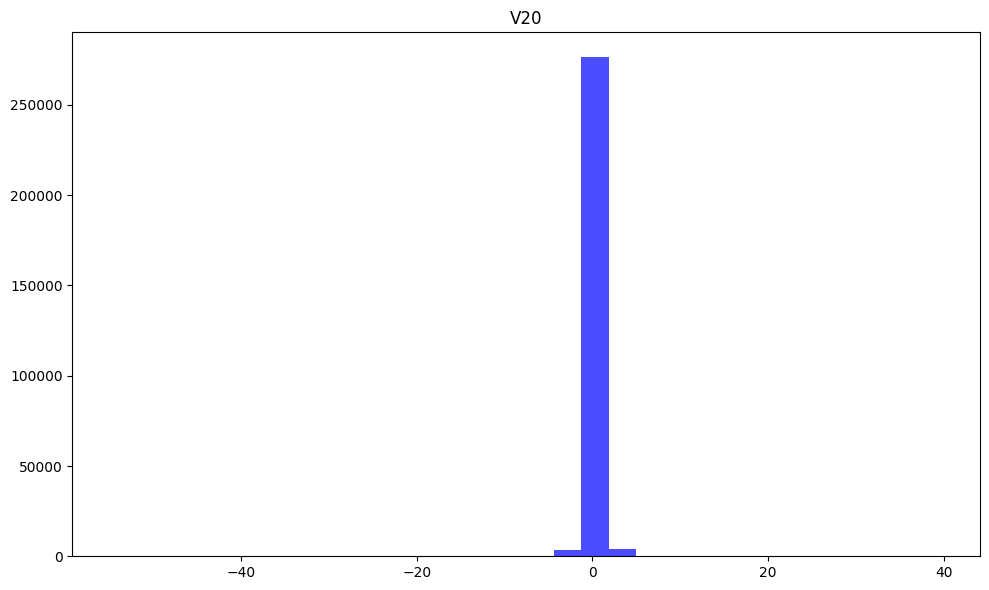

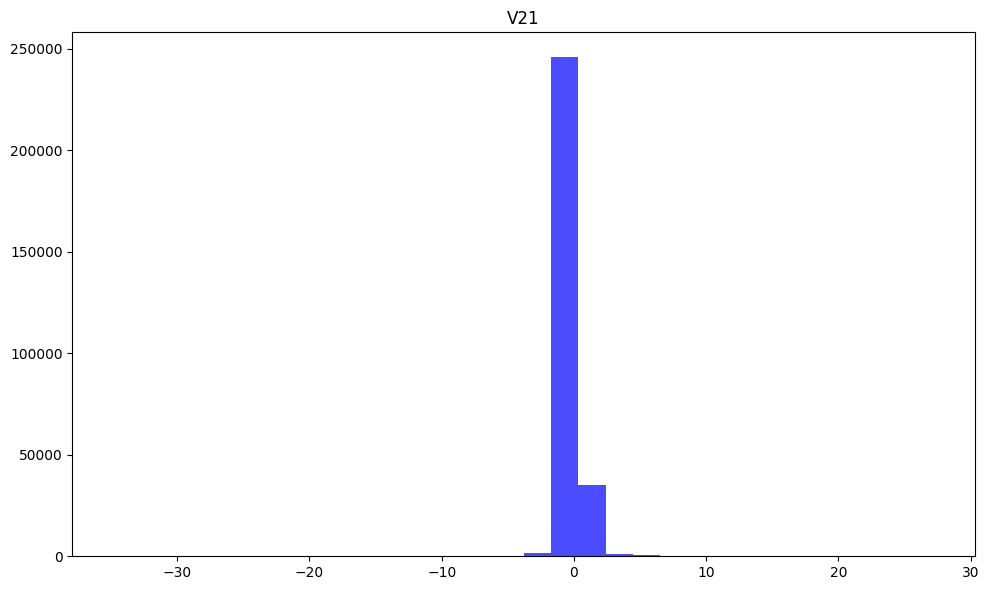

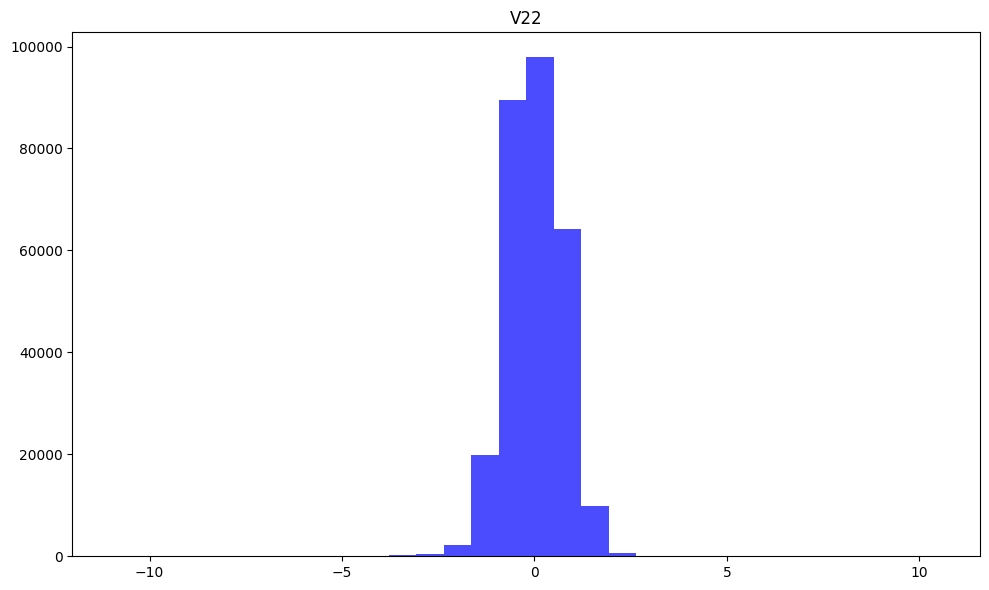

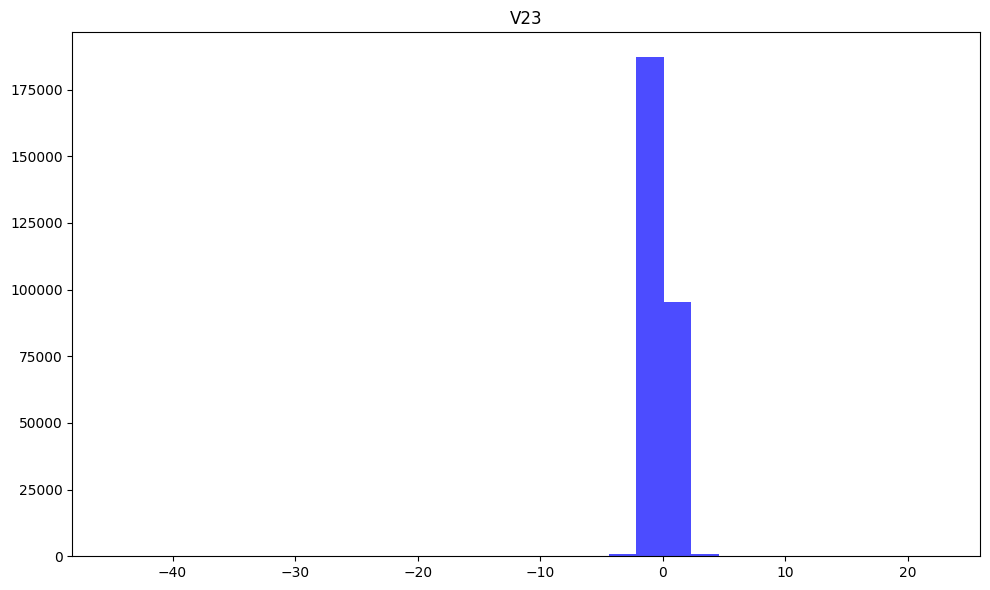

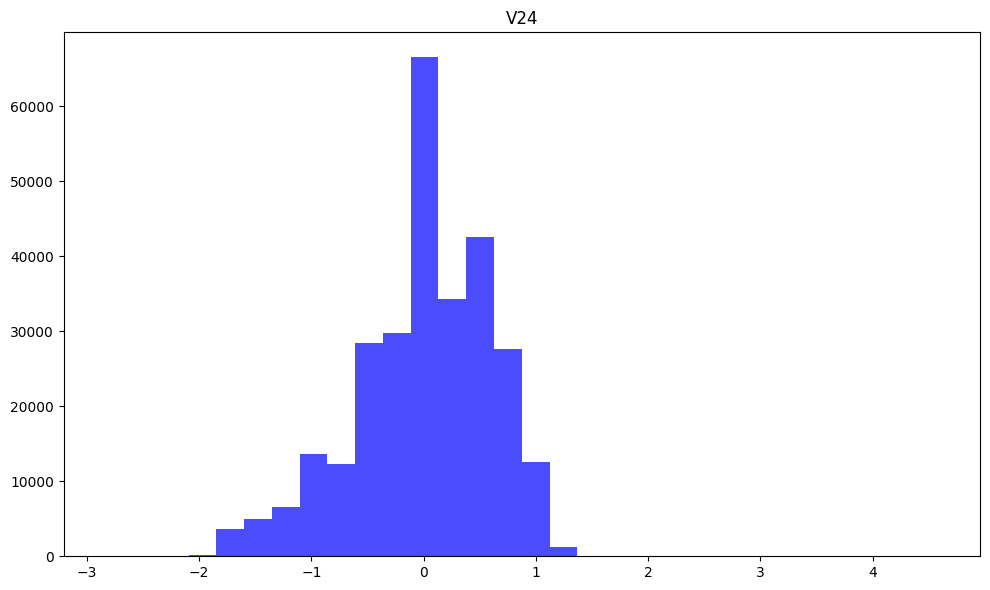

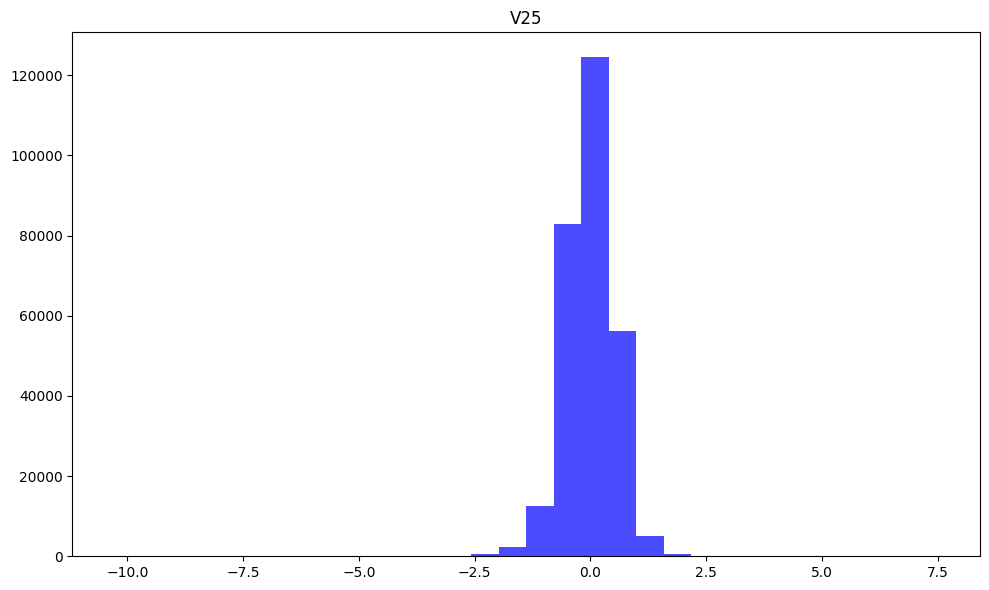

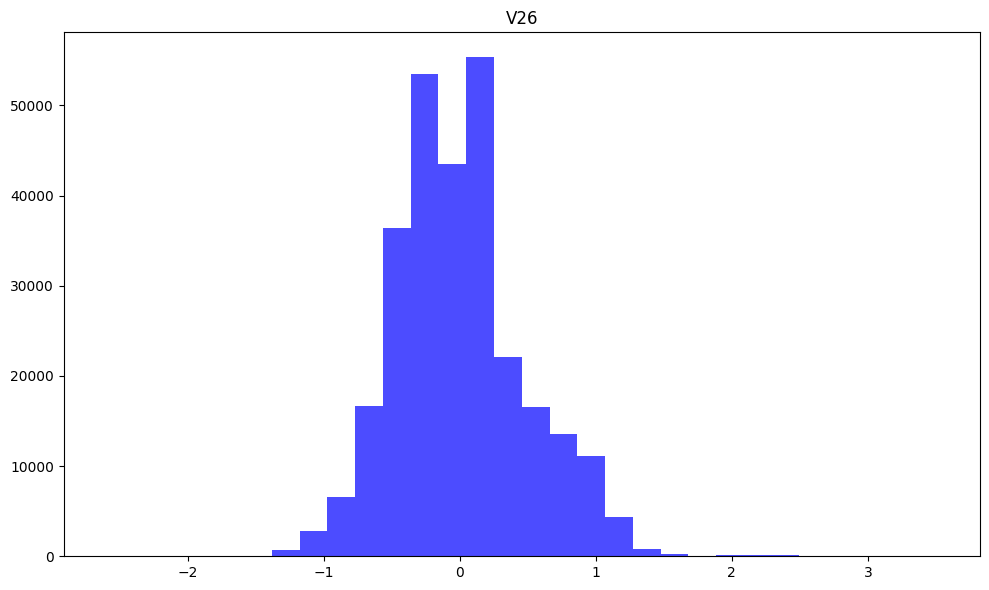

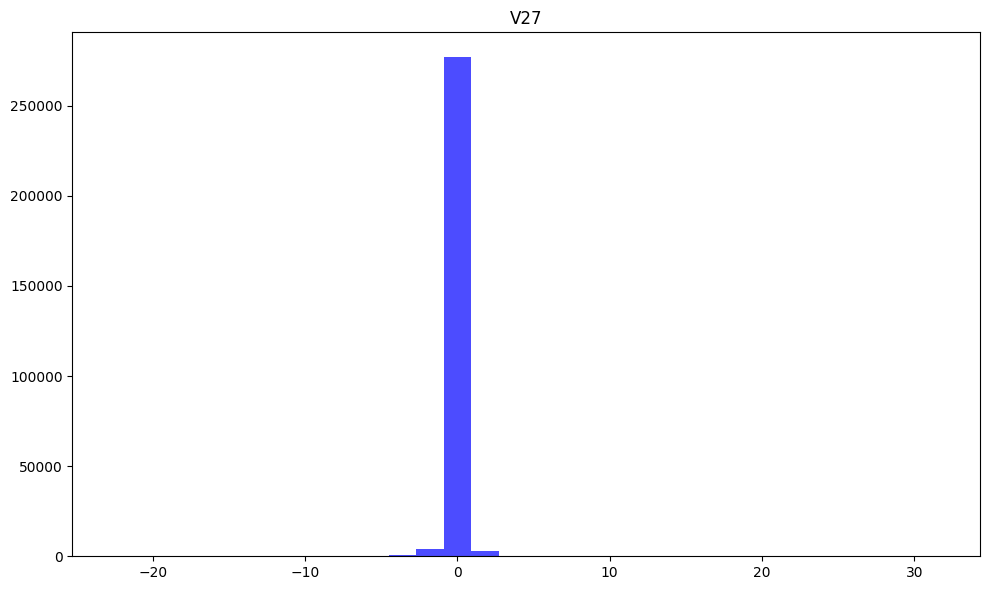

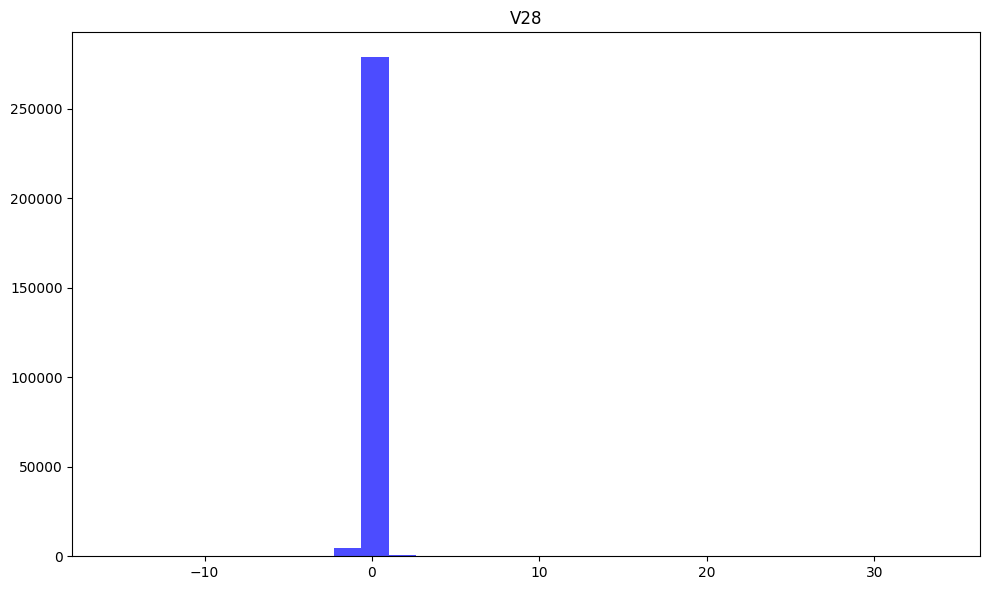

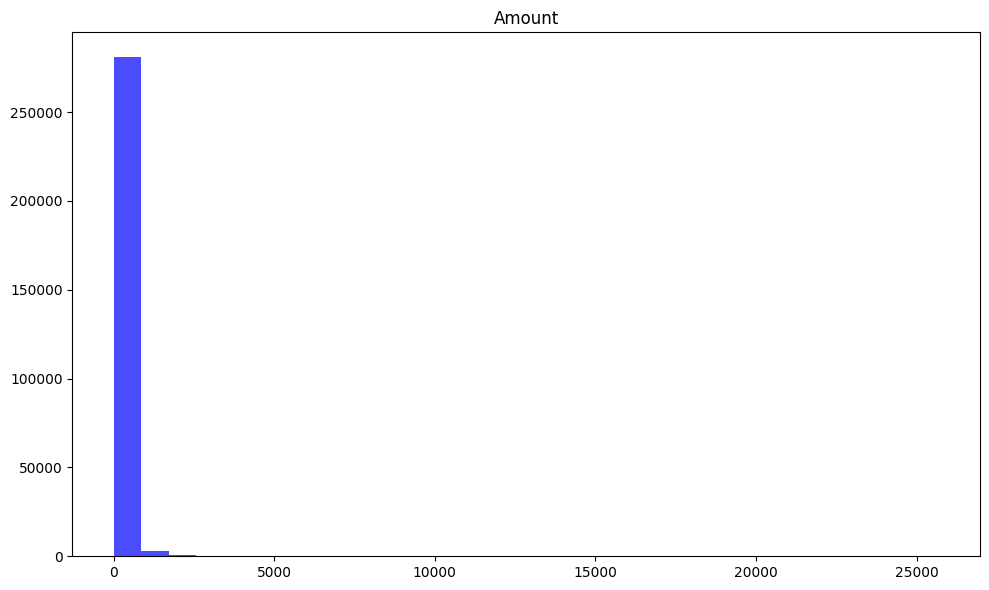

In [ ]:
#Гистограммы
for column in data.drop(columns='Class').columns:
  dp.histogram(data[column], column)

In [ ]:
#Разбиение данных на тестовую и тренировочную выборки(без предобработки данных)
target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Обучим 4 модели(на не предобработанных данных)
model_1 = CatBoostClassifier(verbose=0)
model_2 = RandomForestClassifier()
model_3 = XGBClassifier()
model_4 = ExtraTreesClassifier()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)

#Метрики модели 1
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Точность модели: {accuracy_1:.2f}")

cm_1 = confusion_matrix(y_test, y_pred_1)
print("Матрица истинности:")
print(cm_1)

cr_1 = classification_report(y_test, y_pred_1, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_1)
print('\n')

#Метрики модели 2
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Точность модели: {accuracy_2:.2f}")

cm_2 = confusion_matrix(y_test, y_pred_2)
print("Матрица истинности:")
print(cm_2)

cr_2 = classification_report(y_test, y_pred_2, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_2)
print('\n')

#Метрики модели 3
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Точность модели: {accuracy_3:.2f}")

cm_3 = confusion_matrix(y_test, y_pred_3)
print("Матрица истинности:")
print(cm_3)

cr_3 = classification_report(y_test, y_pred_3, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_3)
print('\n')

#Метрики модели 4
accuracy_4 = accuracy_score(y_test, y_pred_4)
print(f"Точность модели: {accuracy_4:.2f}")

cm_4 = confusion_matrix(y_test, y_pred_4)
print("Матрица истинности:")
print(cm_4)

cr_4 = classification_report(y_test, y_pred_4, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_4)

Точность модели: 1.00
Матрица истинности:
[[85289     6]
 [   36   112]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85290     5]
 [   36   112]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85287     8]
 [   36   112]]
Классификационный отчет:
              precision    recall  f1-score   su

In [ ]:
#Разбиение данных на тестовую и тренировочную выборки(c предобработкой данных)
target_column = 'Class'
numeric_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
categorical_features = []

X, y, preprocessor = dp.preprocess_data(data, target_column, numeric_features, categorical_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Обучим 4 модели(на предобработанных данных)
model_1 = CatBoostClassifier(verbose=0)
model_2 = RandomForestClassifier()
model_3 = XGBClassifier()
model_4 = ExtraTreesClassifier()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)

#Метрики модели 1
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Точность модели: {accuracy_1:.2f}")

cm_1 = confusion_matrix(y_test, y_pred_1)
print("Матрица истинности:")
print(cm_1)

cr_1 = classification_report(y_test, y_pred_1, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_1)
print('\n')

#Метрики модели 2
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Точность модели: {accuracy_2:.2f}")

cm_2 = confusion_matrix(y_test, y_pred_2)
print("Матрица истинности:")
print(cm_2)

cr_2 = classification_report(y_test, y_pred_2, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_2)
print('\n')

#Метрики модели 3
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Точность модели: {accuracy_3:.2f}")

cm_3 = confusion_matrix(y_test, y_pred_3)
print("Матрица истинности:")
print(cm_3)

cr_3 = classification_report(y_test, y_pred_3, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_3)
print('\n')

#Метрики модели 4
accuracy_4 = accuracy_score(y_test, y_pred_4)
print(f"Точность модели: {accuracy_4:.2f}")

cm_4 = confusion_matrix(y_test, y_pred_4)
print("Матрица истинности:")
print(cm_4)

cr_4 = classification_report(y_test, y_pred_4, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_4)

Точность модели: 1.00
Матрица истинности:
[[85289     6]
 [   36   112]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85290     5]
 [   35   113]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85287     8]
 [   36   112]]
Классификационный отчет:
              precision    recall  f1-score   su

In [ ]:
#Загружаем библиотеку для настройки гиперпараметров
from sklearn.model_selection import GridSearchCV

In [ ]:
#XGBoost
target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.4, 0.7],
    'max_depth': [0, 3, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 1000}
Точность модели: 1.00
Матрица истинности:
[[85290     5]
 [   35   113]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#CatBoostClassifier
target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = CatBoostClassifier()

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.1, 0.4, 0.7],
    'depth': [0, 3, 5, 10],
    'verbose': [0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.4, 'verbose': 0}
Точность модели: 1.00
Матрица истинности:
[[85290     5]
 [   37   111]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#ExtraTreesClassifier
target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 3, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'max_depth': None, 'n_estimators': 1000}
Точность модели: 1.00
Матрица истинности:
[[85291     4]
 [   34   114]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.77      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#RandomForestClassifier
target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Точность модели: 1.00
Матрица истинности:
[[85285    10]
 [   42   106]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.72      0.80       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [7]:
#SVC
from sklearn.svm import SVC

target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Точность модели: 1.00
Матрица истинности:
[[85270    25]
 [   37   111]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.75      0.78       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [8]:
!pip install imbalanced-learn scikit-learn

In [9]:
#Разбиение данных на тестовую и тренировочную выборки(используя иснтрумент для решения проблемы дисбаланса классов)
from imblearn.over_sampling import SMOTE

target_column = 'Class'
X = data.drop(columns=target_column)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [11]:
model_1 = CatBoostClassifier(depth=5, iterations=1000, learning_rate=0.4, verbose=0)
model_2 = RandomForestClassifier()
model_3 = XGBClassifier(learning_rate=0.4, max_depth=5, n_estimators=1000)
model_4 = ExtraTreesClassifier(max_depth=None, n_estimators=1000)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)

#Метрики модели 1
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Точность модели: {accuracy_1:.2f}")

cm_1 = confusion_matrix(y_test, y_pred_1)
print("Матрица истинности:")
print(cm_1)

cr_1 = classification_report(y_test, y_pred_1, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_1)
print('\n')

#Метрики модели 2
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Точность модели: {accuracy_2:.2f}")

cm_2 = confusion_matrix(y_test, y_pred_2)
print("Матрица истинности:")
print(cm_2)

cr_2 = classification_report(y_test, y_pred_2, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_2)
print('\n')

#Метрики модели 3
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Точность модели: {accuracy_3:.2f}")

cm_3 = confusion_matrix(y_test, y_pred_3)
print("Матрица истинности:")
print(cm_3)

cr_3 = classification_report(y_test, y_pred_3, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_3)
print('\n')

#Метрики модели 4
accuracy_4 = accuracy_score(y_test, y_pred_4)
print(f"Точность модели: {accuracy_4:.2f}")

cm_4 = confusion_matrix(y_test, y_pred_4)
print("Матрица истинности:")
print(cm_4)

cr_4 = classification_report(y_test, y_pred_4, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr_4)

Точность модели: 1.00
Матрица истинности:
[[85214    81]
 [   26   122]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.60      0.82      0.70       148

    accuracy                           1.00     85443
   macro avg       0.80      0.91      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85277    18]
 [   28   120]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.81      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Точность модели: 1.00
Матрица истинности:
[[85274    21]
 [   27   121]]
Классификационный отчет:
              precision    recall  f1-score   su